# Load Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/My Drive/Shift Academy/Batch4/ML(Classification)/titanic.csv')

## Fisrt Checking 

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Cleansing

## Duplicate

### Checking for Duplicate 

In [6]:
df.duplicated().any()

False

In [7]:
df[df.duplicated()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [8]:
df[df.duplicated()==False].shape[0]

891

## Missing Values

Checking for Missing Values

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
round(df.isnull().sum()/df.shape[0]*100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [11]:
df.drop(columns={'Cabin'}, inplace=True)

In [12]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


Handling with Missing Values

In [13]:
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

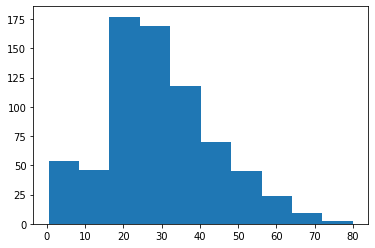

In [14]:
plt.hist(df['Age'])

In [15]:
median_age = df['Age'].median()

In [16]:
median_age

28.0

In [17]:
df['Age'] = df['Age'].fillna(median_age)

In [18]:
df['Age'].isnull().any()

False

In [19]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

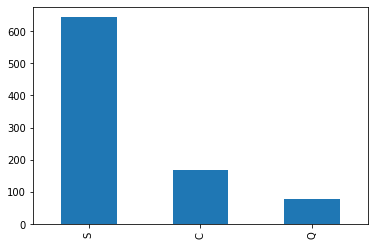

In [20]:
pd.value_counts(df['Embarked']).plot.bar()

In [21]:
mode_embarked = df['Embarked'].mode()[0]

In [22]:
mode_embarked

'S'

In [23]:
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

In [24]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Outliers

Checking for Outliers

In [25]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


{'boxes': [<matplotlib.lines.Line2D at 0x7fbcd1343518>],
 'caps': [<matplotlib.lines.Line2D at 0x7fbcd1343f28>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fbcd12d29e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fbcd12d2668>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fbcd1343828>,
  <matplotlib.lines.Line2D at 0x7fbcd1343ba8>]}

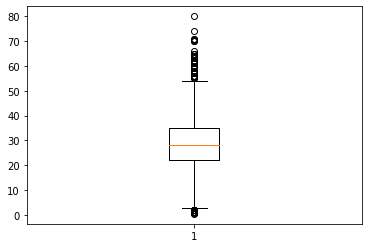

In [26]:
plt.boxplot(df['Age'])

# Data Understanding

## Make Some Plot for The Columns

In [27]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


**PClass**

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [29]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

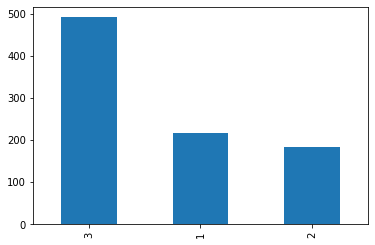

In [30]:
pd.value_counts(df['Pclass']).plot.bar()

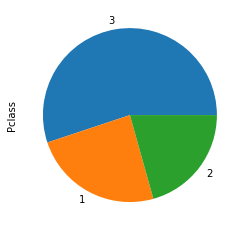

In [31]:
pd.value_counts(df['Pclass']).plot.pie()

**Sex**

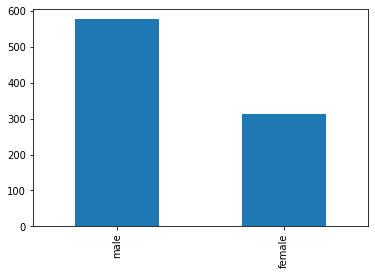

In [32]:
pd.value_counts(df['Sex']).plot.bar()

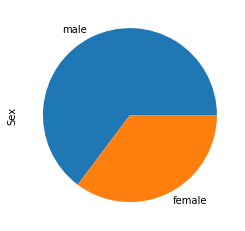

In [33]:
pd.value_counts(df['Sex']).plot.pie()

**Age**

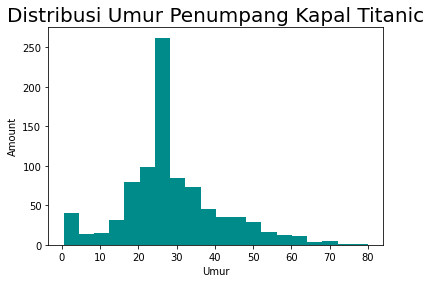

In [34]:
plt.hist(np.array(df['Age']),
         bins=20,
         color='darkcyan')

plt.xlabel('Umur')
plt.ylabel('Amount')
plt.title('Distribusi Umur Penumpang Kapal Titanic',
          fontsize=20)

plt.show()

**Embarked**

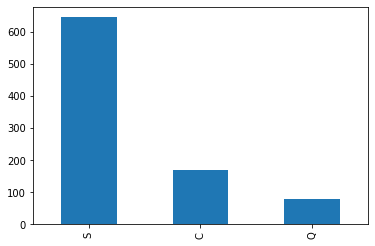

In [35]:
pd.value_counts(df['Embarked']).plot.bar()

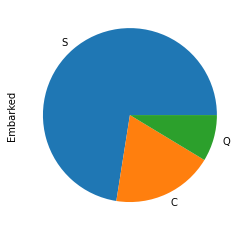

In [36]:
pd.value_counts(df['Embarked']).plot.pie()

**Survived**

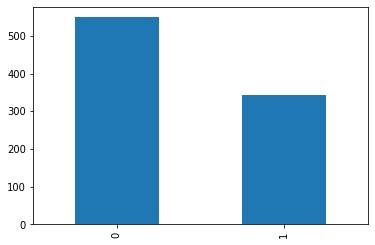

In [37]:
pd.value_counts(df['Survived']).plot.bar()

# Data Preparation

## Encode

In [38]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [39]:
df.drop(columns=['Name', 'SibSp', 'Parch', 'Ticket', 'PassengerId'], inplace=True)

In [40]:
df.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [43]:
df.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,S
1,1,1,0,38.0,71.2833,C


In [44]:
df = pd.get_dummies(df, columns=['Embarked'], prefix=['Embarkasi'])

In [45]:
df.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarkasi_C,Embarkasi_Q,Embarkasi_S
0,0,3,1,22.0,7.2500,0,0,1
1,1,1,0,38.0,71.2833,1,0,0


## Scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scale = MinMaxScaler()
df['Fare'] = scale.fit_transform(np.array(df['Fare']).reshape(-1,1))

In [48]:
df.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarkasi_C,Embarkasi_Q,Embarkasi_S
0,0,3,1,22.0,0.014151,0,0,1
1,1,1,0,38.0,0.139136,1,0,0
2,1,3,0,26.0,0.015469,0,0,1


# EDA

### Faktor apa saja yang berkorelasi dengan penentuan apakah seorang penumpang akan selamat atau tidak

In [49]:
label = df['Survived']

In [50]:
df_corr = df.drop(columns=['Survived'])

In [51]:
df_corr['Label'] = label

In [52]:
df_corr.head(3)

,Pclass,Sex,Age,Fare,Embarkasi_C,Embarkasi_Q,Embarkasi_S,Label
0,3,1,22.0,0.014151,0,0,1,0
1,1,0,38.0,0.139136,1,0,0,1
2,3,0,26.0,0.015469,0,0,1,1


In [53]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Variable Correlation Heatmap')

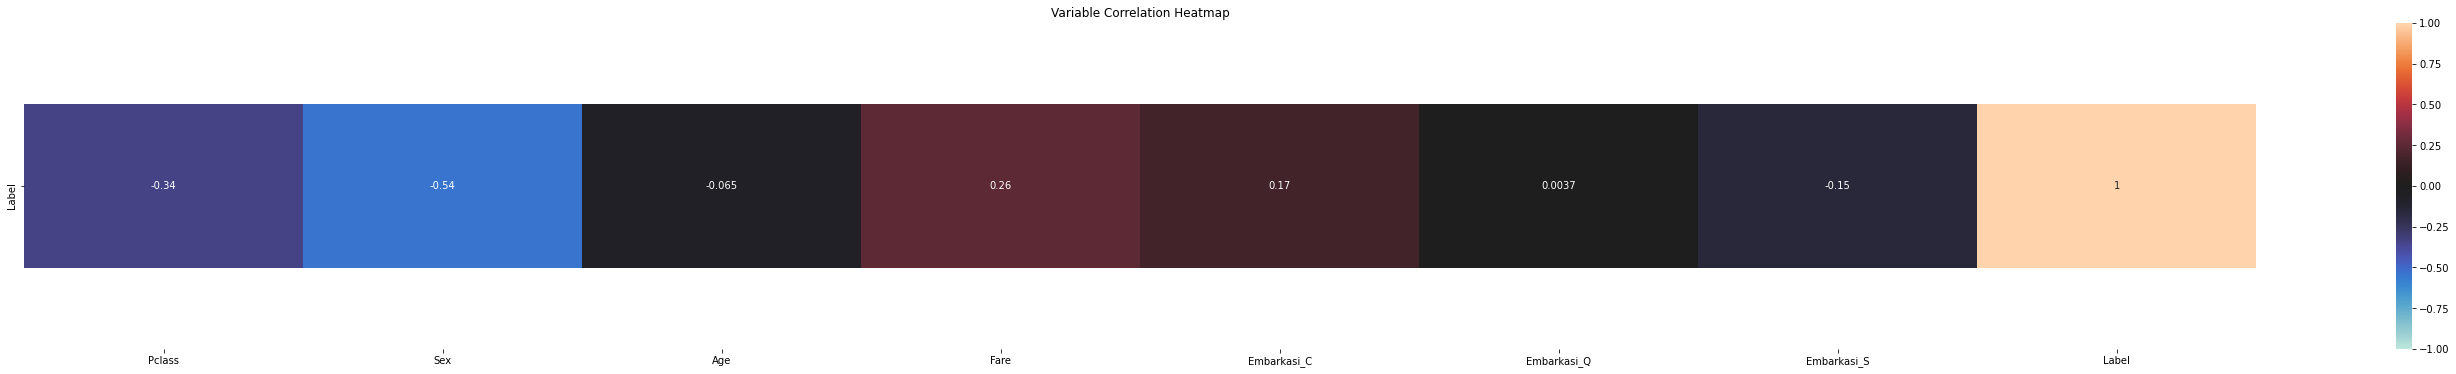

In [54]:
corr = df_corr.corr()
corr2 = corr.iloc[-1:,:]

plt.figure(figsize=(50,6))
ax = sns.heatmap(corr2, annot=True, vmin=-1, vmax=1, center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Variable Correlation Heatmap')

In [55]:
kelas_1 = df[df['Pclass']==1]
kelas_2 = df[df['Pclass']==2]
kelas_3 = df[df['Pclass']==3]

In [56]:
kelas_1['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

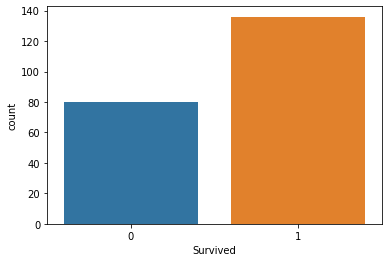

In [57]:
sns.countplot(kelas_1['Survived'])

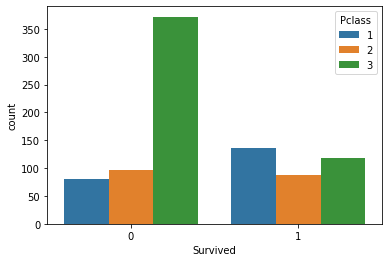

In [58]:
sns.countplot(df['Survived'], hue=df['Pclass'])

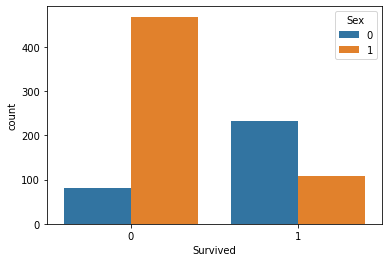

In [59]:
sns.countplot(df['Survived'], hue=df['Sex'])

# Train Test Split

In [60]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarkasi_C,Embarkasi_Q,Embarkasi_S
0,0,3,1,22.0,0.014151,0,0,1
1,1,1,0,38.0,0.139136,1,0,0
2,1,3,0,26.0,0.015469,0,0,1
3,1,1,0,35.0,0.103644,0,0,1
4,0,3,1,35.0,0.015713,0,0,1


In [61]:
y = df['Survived']
X = df.drop(columns=['Survived'])

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Modeling

## Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
log_reg = LogisticRegression()

In [66]:
#build model
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluation

In [67]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

**Confussion Matrix**

Text(0.5, 1.0, 'Confussion Matrix Logreg')

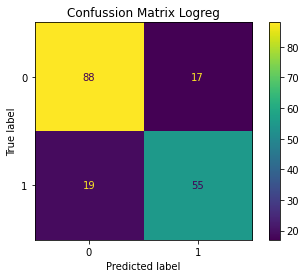

In [68]:
plot_confusion_matrix(log_reg, X_test, y_test)
plt.title('Confussion Matrix Logreg')

In [69]:
log_reg_predict = log_reg.predict(X_test)

In [70]:
print(log_reg_predict)

[0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


**Classification Report**

In [71]:
print(classification_report(y_test, log_reg_predict))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



**ROC AUC Score**

In [72]:
print(roc_auc_score(y_test, log_reg_predict))

0.7906692406692406


## KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn = KNeighborsClassifier()

In [75]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Evaluation

**Confussion Matrix**

Text(0.5, 1.0, 'Confussion Matrix KNN')

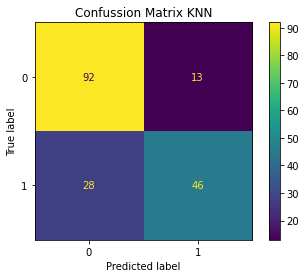

In [76]:
plot_confusion_matrix(knn, X_test, y_test)
plt.title('Confussion Matrix KNN')

**Classification Report**

In [77]:
knn_predict = knn.predict(X_test)

In [78]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       105
           1       0.78      0.62      0.69        74

    accuracy                           0.77       179
   macro avg       0.77      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179



**ROC AUC score**

In [79]:
roc_auc_score(y_test, knn_predict)

0.7489060489060488

## Desicion Tree

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
Tree = DecisionTreeClassifier()

In [82]:
Tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Evaluation

**Confussion Matrix**

Text(0.5, 1.0, 'Confussion Matrix Desicion Tree')

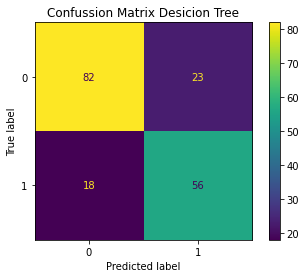

In [83]:
plot_confusion_matrix(Tree, X_test, y_test)
plt.title('Confussion Matrix Desicion Tree')

**Classification Report**

In [85]:
tree_predict = Tree.predict(X_test)
print(classification_report(y_test, tree_predict))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       105
           1       0.71      0.76      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.77      0.77      0.77       179



**ROC AUC Score**

In [86]:
print(roc_auc_score(y_test, tree_predict))

0.7688545688545689


In [ ]:
as we can see model yang memiliki akurasi tertinggi adalah decision tree